In [1]:
# !ls -hl|grep csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from time import time, ctime

from sklearn.metrics import accuracy_score, classification_report, classification, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, StratifiedShuffleSplit

from helper import plot_confusion_matrix, plot_confusion_matrix2
dim=lambda *x: [i.shape for i in x]

In [2]:
from keras import backend as K
import tensorflow as tf

config = tf.ConfigProto(intra_op_parallelism_threads=24, 
                        inter_op_parallelism_threads=24,
                        allow_soft_placement=True, 
                        device_count = {'CPU': 1})
session = tf.Session(config=config)
K.set_session(session)

Using TensorFlow backend.


In [3]:
%%time
df = pd.read_csv('./preprocessed.csv')
print df.shape

(49260, 748)
CPU times: user 2.98 s, sys: 201 ms, total: 3.18 s
Wall time: 3.2 s


In [20]:
pd.options.display.max_columns=100
df.head(3)

,username,fname.gender,username_split_predict,last,last_two,first,first2,nchar,vowels.pct,digits.pct,last_is_vowel,first_is_vowel,last_is_digit,first_is_digit,digits.num,upper.pct,first_is_upper,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,...,feature_681,feature_682,feature_683,feature_684,feature_685,feature_686,feature_687,feature_688,feature_689,feature_690,feature_691,feature_692,feature_693,feature_694,feature_695,feature_696,feature_697,feature_698,feature_699,feature_700,feature_701,feature_702,feature_703,feature_704,feature_705,feature_706,feature_707,feature_708,feature_709,feature_710,feature_711,feature_712,feature_713,feature_714,feature_715,feature_716,feature_717,feature_718,feature_719,feature_720,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730
0,billion,male,unknow,n,on,b,bi,7,0.428571,0.0,False,False,False,False,0,0,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,7.0
1,ArmenSoft,male,male,t,ft,A,Ar,9,0.222222,0.0,False,False,False,False,0,2,True,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,9.0
2,okbookman,male,female,n,an,o,ok,9,0.444444,0.0,False,True,False,False,0,0,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,9.0


In [21]:
# %%time
# print df.columns.values[2:9]
# def label_encode(df, columns):
#     for col in columns:
#         le = LabelEncoder()
#         col_values_unique = list(df[col].unique())
#         le_fitted = le.fit(col_values_unique)
 
#         col_values = list(df[col].values)
#         le.classes_
#         col_values_transformed = le.transform(col_values)
#         df[col] = col_values_transformed
 
# to_be_encoded_cols = df.columns.values[2:9]
# label_encode(df, to_be_encoded_cols)

In [22]:
df.head(3)

,username,fname.gender,username_split_predict,last,last_two,first,first2,nchar,vowels.pct,digits.pct,last_is_vowel,first_is_vowel,last_is_digit,first_is_digit,digits.num,upper.pct,first_is_upper,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,...,feature_681,feature_682,feature_683,feature_684,feature_685,feature_686,feature_687,feature_688,feature_689,feature_690,feature_691,feature_692,feature_693,feature_694,feature_695,feature_696,feature_697,feature_698,feature_699,feature_700,feature_701,feature_702,feature_703,feature_704,feature_705,feature_706,feature_707,feature_708,feature_709,feature_710,feature_711,feature_712,feature_713,feature_714,feature_715,feature_716,feature_717,feature_718,feature_719,feature_720,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730
0,billion,male,unknow,n,on,b,bi,7,0.428571,0.0,False,False,False,False,0,0,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,7.0
1,ArmenSoft,male,male,t,ft,A,Ar,9,0.222222,0.0,False,False,False,False,0,2,True,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,9.0
2,okbookman,male,female,n,an,o,ok,9,0.444444,0.0,False,True,False,False,0,0,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,9.0


In [23]:
%%time
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17179171194680952400
]
CPU times: user 0 ns, sys: 1e+03 µs, total: 1e+03 µs
Wall time: 467 µs


In [24]:
# X_train, X_test, y_train, y_test =train_test_split(pre0.iloc[:,2:], pre0.iloc[:,1], test_size=.3, stratify =pre0.iloc[:,1], 
#                                                   random_state=7)
# print dim(X_train, y_train, X_test, y_test )
# X_train.head(1)

In [25]:
X = df.iloc[:,2:].values
print X.shape
y = df.iloc[:,1].map({'male':1,'female':0}).values
print y.shape

(49260, 746)
(49260,)


In [26]:
%%time
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])
labelencoder_X_2 = LabelEncoder()
X[:, 1] = labelencoder_X_2.fit_transform(X[:, 1])
labelencoder_X_1 = LabelEncoder()
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2])
labelencoder_X_2 = LabelEncoder()
X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3])
labelencoder_X_1 = LabelEncoder()
X[:, 4] = labelencoder_X_1.fit_transform(X[:, 4])
XX=X.copy()

CPU times: user 1.2 s, sys: 41 ms, total: 1.24 s
Wall time: 1.24 s


In [27]:
# %%time
# print X.shape
# onehotencoder = OneHotEncoder(categorical_features = range(6))
# X = onehotencoder.fit_transform(X).toarray()
# print X.shape

In [28]:
# # remove one dummy variable to avoid dummy variable trap
# print X.shape
# X = X[:, 1:]
# print X.shape

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=7)
dim(X_train, X_test, y_train, y_test)

[(34482, 746), (14778, 746), (34482,), (14778,)]

In [30]:
%%time
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# fit on training set
X_train = sc.fit_transform(X_train)
# only transform on test set
X_test = sc.transform(X_test)
print dim(X_train,X_test, y_train, y_test)

/home/shj16110/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[(34482, 746), (14778, 746), (34482,), (14778,)]
CPU times: user 6.17 s, sys: 171 ms, total: 6.34 s
Wall time: 6.36 s


### build ANN

In [96]:
classifier = Sequential()
# first hidden layer
classifier.add(Dense(units = 128, 
#                      input_dim=4504, 
                     input_dim=746,
                     kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.3))
# second hidden layer
classifier.add(Dense(units = 96,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.2))
# second hidden layer
classifier.add(Dense(units = 64,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.1))
# thrid hidden layer
classifier.add(Dense(units = 48,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.1))
# thrid hidden layer
classifier.add(Dense(units = 32,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.1))
# thrid hidden layer
classifier.add(Dense(units = 24,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.1))
# thrid hidden layer
classifier.add(Dense(units = 24,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.1))
# thrid hidden layer
classifier.add(Dense(units = 24,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.1))
# thrid hidden layer
classifier.add(Dense(units = 24,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.1))
# thrid hidden layer
classifier.add(Dense(units = 24,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.1))
# thrid hidden layer
classifier.add(Dense(units = 24,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.1))
# thrid hidden layer
classifier.add(Dense(units = 16,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.1))
# thrid hidden layer
classifier.add(Dense(units = 16,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.1))
# # ouput layer
classifier.add(Dense(units = 1,  kernel_initializer='uniform', activation='sigmoid'))
# compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 96)                71712     
_________________________________________________________________
dropout_87 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 64)                6208      
_________________________________________________________________
dropout_88 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_105 (Dense)            (None, 48)                3120      
_________________________________________________________________
dropout_89 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_106 (Dense)            (None, 32)                1568      
__________

In [101]:
from keras.callbacks import Callback, EarlyStopping
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=1)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

In [102]:
stopping = EarlyStopping(monitor='acc', min_delta=0,
                              patience=6, verbose=1, mode='auto')

In [103]:
%%time
# fitting ANN with training set
classifier.fit(X_train, y_train, 
               batch_size=64, epochs=64,
               validation_data=(X_test, y_test),
#           callbacks=[TestCallback((X_test, y_test))])
          callbacks=[stopping])
    


Train on 34482 samples, validate on 14778 samples
Epoch 1/64
34482/34482 [==============================] - 2s 64us/step - loss: 0.3722 - acc: 0.8200 - val_loss: 0.4885 - val_acc: 0.8198
Epoch 2/64
34482/34482 [==============================] - 2s 64us/step - loss: 0.3694 - acc: 0.8200 - val_loss: 0.4951 - val_acc: 0.8198
Epoch 3/64
34482/34482 [==============================] - 2s 64us/step - loss: 0.3586 - acc: 0.8401 - val_loss: 0.5123 - val_acc: 0.8118
Epoch 4/64
34482/34482 [==============================] - 2s 64us/step - loss: 0.3496 - acc: 0.8535 - val_loss: 0.4981 - val_acc: 0.8063
Epoch 5/64
34482/34482 [==============================] - 2s 65us/step - loss: 0.3434 - acc: 0.8564 - val_loss: 0.5441 - val_acc: 0.8037
Epoch 6/64
34482/34482 [==============================] - 2s 64us/step - loss: 0.3360 - acc: 0.8576 - val_loss: 0.6175 - val_acc: 0.8110
Epoch 7/64
34482/34482 [==============================] - 2s 64us/step - loss: 0.3305 - acc: 0.8630 - val_loss: 0.5177 - val_acc

34482/34482 [==============================] - 2s 64us/step - loss: 0.1799 - acc: 0.9310 - val_loss: 0.8376 - val_acc: 0.7935
Epoch 61/64
34482/34482 [==============================] - 2s 64us/step - loss: 0.1807 - acc: 0.9302 - val_loss: 0.7333 - val_acc: 0.7913
Epoch 62/64
34482/34482 [==============================] - 2s 65us/step - loss: 0.1740 - acc: 0.9327 - val_loss: 0.7741 - val_acc: 0.7915
Epoch 63/64
34482/34482 [==============================] - 2s 64us/step - loss: 0.1785 - acc: 0.9301 - val_loss: 0.9402 - val_acc: 0.7952
Epoch 64/64
34482/34482 [==============================] - 2s 65us/step - loss: 0.1763 - acc: 0.9334 - val_loss: 0.7136 - val_acc: 0.7912
CPU times: user 6min 9s, sys: 2min 53s, total: 9min 2s
Wall time: 2min 21s


0.79117607254
Confusion matrix, without normalization
[[  703  1960]
 [ 1126 10989]]


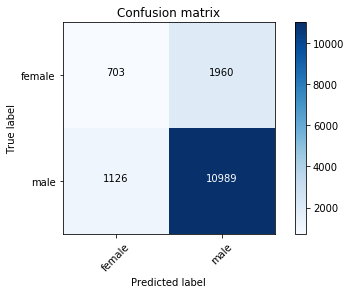

CPU times: user 1.08 s, sys: 377 ms, total: 1.46 s
Wall time: 592 ms


In [104]:
%%time
y_pred = classifier.predict(X_test)
y_pred = (y_pred> 0.5)

print accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['female','male'])

### parameter tuning

In [19]:
from keras.wrappers.scikit_learn import KerasClassifier
# k-fold cross validation
from sklearn.model_selection import GridSearchCV